## Example 1 - Simple timeseries plot <a class="anchor" id="TOC6"></a>

The following code is used to load data from an Electric Low Pressure Impactor (ELPI, Dekati) .dat file, and plotting it as a time series before storing the resulting figure at the specified location as a .png file. 

#### Example 1 full script:
First I show the full code, which can be copy and pasted into a new script, where it is only necessary to change the paths and filenames to make it work. Afterwards I will go through each line in detail to describe the in- and outputs of the different functions.

No zeros, continuing
Plot was saved


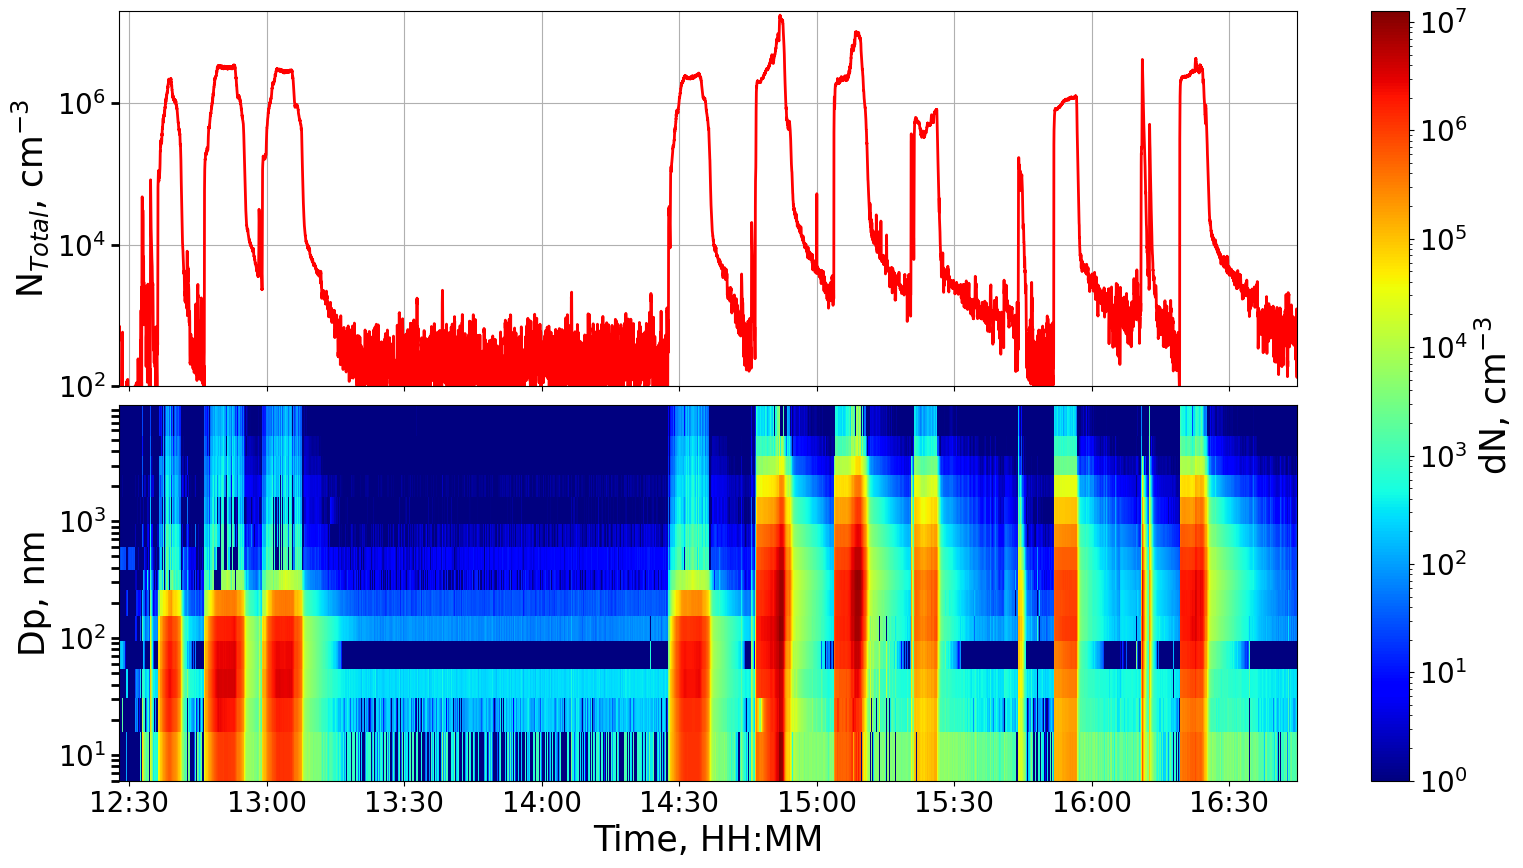

In [2]:
import NFA_Aerosol.Instrument_Lib as IL
import NFA_Aerosol.Plot_Lib as PL
import NFA_Aerosol.Utility_Lib as UL

ELPI_File = r"Example Data\ELPI_File.dat"
Save_path = r"Example Data\\"
plot_name = "ELPI_plot"

data, bin_edges, header = IL.Load_ELPI(ELPI_File)

fig, axs = PL.Plot_timeseries(data, bin_edges,y_3d=(1,0),y_tot=(1e2,2e7))

UL.Save_plot(fig,plot_name,Save_path)

#### Example 1 in detail:

The first three lines, after importing the NFA library, are the inputs, describing the data file location and name as well as where to save the plot. To specify where the ELPI datafile is located we store the path in a variable called ELPI_File. We specify the path as a string (surrounded by the quotation marks). The r in front of the string is to tell Python that backslash is a part of the path and not an escape character for calling a function within the string. Similarly the Save_path specifies in which folder to save the produced figure, and plot_name specifies the name of the produces image. The default image type is .png, but other extensions can be used. These have to be given to the save function e.g. UL.Save_plot(fig,plot_name,Save_path,extension=".tif") for a .tif image.

In [ ]:
ELPI_File = r"Data_Python\ELPI_File.dat"
Save_path = r"Data_Python\\"
plot_name = "ELPI_plot"

The next line in the script calls the Load_Elpi function from the Instrument_Library, which is abbreviated IL (specified at the import Instrument_Library as IL in the top of the script). The only input needed for the Load_ELPI is the file location of the ELPI datafile. However, the Load_Elpi function can also take two additional arguments namely start and stop, which can be used if only part of the datafile is to be loaded, but by default the entire file is loaded. For use of the start and stop parameters see example 2. Here I have also printed the first 10 lines of the data, as well as the bin_edges and header outputs, which are returned by the Load_ELPI function, so you can see the what comes out.

In [4]:
data, bin_edges, header = IL.Load_ELPI(ELPI_File)

print("""This is the header for each of the columns in the data variable. 
The numbers at the end are the midpoints of all the ELPI size bins in nm: """)
print(header)

print()

print("These are the edges of all the ELPI sizebins in nm: ")
print(bin_edges)

print()

print("These are the first 5 rows and all colums of the data variable: ")
print(data[:5,:])

This is the header for each of the columns in the data variable. 
The numbers at the end are the midpoints of all the ELPI size bins in nm: 
['Datetime', 'Total Concentration', 11.0, 23.0, 42.0, 75.0, 126.0, 206.0, 320.0, 494.0, 776.0, 1290.0, 2050.0, 3065.0, 4515.0, 7630.0]

These are the edges of all the ELPI sizebins in nm: 
[6.00e+00 1.57e+01 3.04e+01 5.45e+01 9.53e+01 1.56e+02 2.57e+02 3.83e+02
 6.04e+02 9.49e+02 1.63e+03 2.47e+03 3.66e+03 5.37e+03 9.89e+03]

These are the first 5 rows and all colums of the data variable: 
[[datetime.datetime(2020, 5, 4, 12, 27, 51) 453.7 1084.0 0.0 0.0 0.0 0.0
  0.0 0.0 0.0 0.0 1.19 0.0 2.437 0.0 0.0]
 [datetime.datetime(2020, 5, 4, 12, 27, 52) 709.4 1696.0 0.0 0.0 0.0
  0.7154 0.0 0.0 0.0 0.0 1.609 0.0 1.56 0.0 0.05442]
 [datetime.datetime(2020, 5, 4, 12, 27, 53) 64.18 0.0 0.0 0.0 244.8 0.0
  0.0 0.0 24.15 0.0 0.0 0.0 0.0 0.0 0.0]
 [datetime.datetime(2020, 5, 4, 12, 27, 54) 75.09 0.0 0.0 0.0 285.5 0.0
  0.0 0.0 29.2 0.0 0.0 0.1657 0.0 0.0 0.0]
 

Here you can see that the first column in the data variable are of the type datetime.datetime, which is the datatype that Python uses to handle dates and times. It is very convenient, as dates and times are otherwise very difficult to work with, when treating and plotting data but telling python that it is a datetime object will let us plot it easily. The second column in the data variable is the total concentration, while everything after that is sizebin concentrations. Not all Load_xxx functions include sizebin data e.g. the CPC, which only measures total concentration. For such instruments, there are only two columns namely the datetime and the total concentration.

The next line in the script is to generate the time series plot:

In [ ]:
fig, axs = PL.Plot_timeseries(data, bin_edges,y_3d=(1,0),y_tot=(1e2,2e7))

The Plot_timeseries function requires first the data variable, then the edges of all the sizebins as returned from the Load_Elpi function. Finally, you can speicfy the limits of the total number concentration plot, which here has been set to 100-20.000.000. If no limits are given or if 0 is pased for one of the settings, python will use the lowest and/or highest values of the dataset, but sometimes it is nice to crop off spikes. If you only wanted to set an upper limit you would write y_tot = (0,2e7), in which case Python would plot from the lowest value of the dataset to 20.000.000. 

The y_3d input specifies the limits of the colorbar, which often has to be set with a lower boundary, as Python complains when the dataset has zeros that cannot be plotted on a log scale. The colobar can be set both as regular or as logarithmic by setting "log=0" or "log=1" (PL.Plot_timeseries(data, bin_edges,y_tot=(1e2,1e5),y_3d=(1,0),log=1)).

Finally we save the plot:

In [ ]:
UL.Save_plot(fig,plot_name,Save_path)

The Save_plot function takes a matplotlib.figure.Figure as its first input. These types of figure objects are always returned as the first output of the plotting functions in the NFA python Library. The following two inputs are the decired name of the saved image file and the path/folder to save it in